# Análise de Cancelamentos de Reservas Hoteleiras e Impacto na Geração de Receitas

### 1.Contexto e Problema de Negócio

Nos últimos anos, o City Hotel e o Resort Hotel têm registado elevadas taxas de cancelamento de reservas, resultando na redução das receitas e numa utilização ineficiente dos quartos disponíveis. A diminuição destas taxas constitui uma prioridade estratégica para ambos os hotéis, de modo a melhorar a eficiência operacional e maximizar a geração anual de receitas.

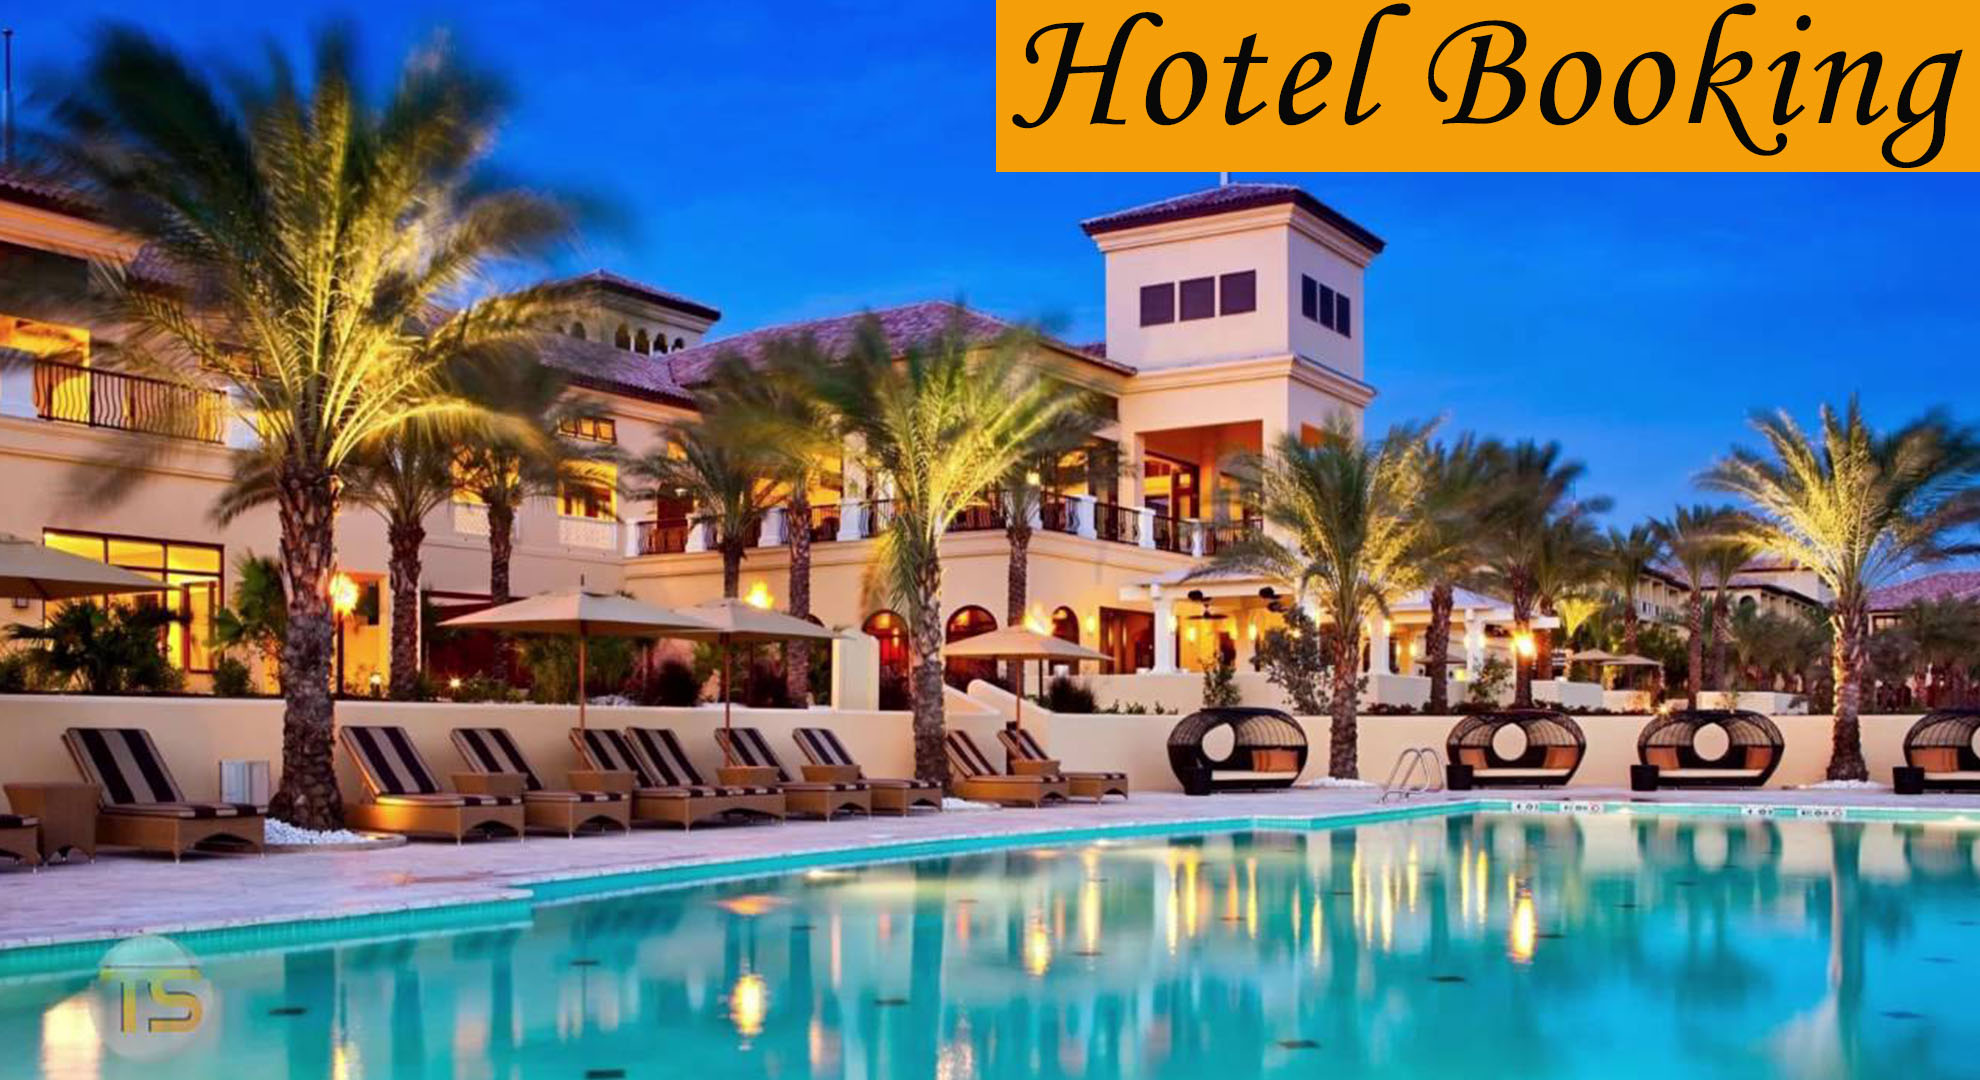

# 2.Objectivo do Projecto


### 2.1.Objectivo Geral

Analisar os padrões de cancelamento de reservas hoteleiras e o seu impacto na geração de receitas no City Hotel e no Resort Hotel.

### 2.2.Objectivos Específicos

--Identificar a taxa de cancelamento de reservas;

--Comparar reservas canceladas e não canceladas;

--Avaliar o impacto dos cancelamentos na tarifa média diária;

--Analisar a evolução temporal dos cancelamentos;

--Apoiar a formulação de recomendações empresariais.

In [14]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Lê o ficheiro CSV contendo os dados de reservas hoteleiras
df=pd.read_csv('data/hotel_booking.csv')

#### Analise Exploratoria e Limpeza de Dados

In [5]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734


In [6]:
# Renomeia algumas colunas do inglês para português
# para facilitar a leitura e interpretação do código
df = df.rename(columns={
    'hotel': 'Hotel',
    'is_canceled': 'reserva_cancelada',
    'lead_time': 'dias_antecedencia_reserva',
    'arrival_date_year': 'ano_chegada',
    'arrival_date_month': 'mes_chegada',
    'arrival_date_week_number': 'semana_do_ano_chegada',
    'arrival_date_day_of_month': 'dia_do_mes_chegada',
    'stays_in_weekend_nights': 'noites_fim_de_semana',
    'stays_in_week_nights': 'noites_durante_semana',
    'adults': 'adultos',
    'children': 'criancas',
    'babies': 'bebes',
    'meal': 'regime_refeicao',
    'country': 'pais',
    'market_segment': 'segmento_mercado',
    'distribution_channel': 'canal_distribuicao',
    'is_repeated_guest': 'cliente_repetente',
    'previous_cancellations': 'cancelamentos_anteriores',
    'previous_bookings_not_canceled': 'reservas_anteriores_nao_canceladas',
    'reserved_room_type': 'tipo_quarto_reservado',
    'assigned_room_type': 'tipo_quarto_atribuido',
    'booking_changes': 'alteracoes_na_reserva',
    'deposit_type': 'tipo_deposito',
    'agent': 'agente',
    'company': 'empresa',
    'days_in_waiting_list': 'dias_em_lista_espera',
    'customer_type': 'tipo_cliente',
    'adr': 'tarifa_media_diaria',
    'required_car_parking_spaces': 'vagas_estacionamento_requeridas',
    'total_of_special_requests': 'total_pedidos_especiais',
    
    'reservation_status': 'estado_reserva',
  
    'reservation_status_date': 'data_estado_reserva',
    'name': 'nome',
    'email': 'email',
    'phone-number': 'telefone',
    'credit_card': 'cartao_credito'
})



In [7]:
df.head()

,Hotel,reserva_cancelada,dias_antecedencia_reserva,ano_chegada,mes_chegada,semana_do_ano_chegada,dia_do_mes_chegada,noites_fim_de_semana,noites_durante_semana,adultos,...,tipo_cliente,tarifa_media_diaria,vagas_estacionamento_requeridas,total_pedidos_especiais,estado_reserva,data_estado_reserva,nome,email,telefone,cartao_credito
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [8]:
df.shape

(119390, 36)

In [9]:
df.columns

Index(['Hotel', 'reserva_cancelada', 'dias_antecedencia_reserva',
       'ano_chegada', 'mes_chegada', 'semana_do_ano_chegada',
       'dia_do_mes_chegada', 'noites_fim_de_semana', 'noites_durante_semana',
       'adultos', 'criancas', 'bebes', 'regime_refeicao', 'pais',
       'segmento_mercado', 'canal_distribuicao', 'cliente_repetente',
       'cancelamentos_anteriores', 'reservas_anteriores_nao_canceladas',
       'tipo_quarto_reservado', 'tipo_quarto_atribuido',
       'alteracoes_na_reserva', 'tipo_deposito', 'agente', 'empresa',
       'dias_em_lista_espera', 'tipo_cliente', 'tarifa_media_diaria',
       'vagas_estacionamento_requeridas', 'total_pedidos_especiais',
       'estado_reserva', 'data_estado_reserva', 'nome', 'email', 'telefone',
       'cartao_credito'],
      dtype='object')

In [10]:
# Exibe informações gerais sobre o dataset:
# tipos de dados, valores nulos e uso de memória
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Hotel                               119390 non-null  object 
 1   reserva_cancelada                   119390 non-null  int64  
 2   dias_antecedencia_reserva           119390 non-null  int64  
 3   ano_chegada                         119390 non-null  int64  
 4   mes_chegada                         119390 non-null  object 
 5   semana_do_ano_chegada               119390 non-null  int64  
 6   dia_do_mes_chegada                  119390 non-null  int64  
 7   noites_fim_de_semana                119390 non-null  int64  
 8   noites_durante_semana               119390 non-null  int64  
 9   adultos                             119390 non-null  int64  
 10  criancas                            119386 non-null  float64
 11  bebes                     

In [11]:
# Cria uma nova coluna que combina ano, mês e dia de chegada
# Convertendo o resultado para o tipo datetime
#Esta coluna permite análises temporais, essenciais para identificar padrões sazonais de cancelamento.
df['data_estado_reserva']=pd.to_datetime(df['data_estado_reserva'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   Hotel                               119390 non-null  object        
 1   reserva_cancelada                   119390 non-null  int64         
 2   dias_antecedencia_reserva           119390 non-null  int64         
 3   ano_chegada                         119390 non-null  int64         
 4   mes_chegada                         119390 non-null  object        
 5   semana_do_ano_chegada               119390 non-null  int64         
 6   dia_do_mes_chegada                  119390 non-null  int64         
 7   noites_fim_de_semana                119390 non-null  int64         
 8   noites_durante_semana               119390 non-null  int64         
 9   adultos                             119390 non-null  int64         
 10  criancas

In [13]:
df.describe(include='object')

,Hotel,mes_chegada,regime_refeicao,pais,segmento_mercado,canal_distribuicao,tipo_quarto_reservado,tipo_quarto_atribuido,tipo_deposito,tipo_cliente,estado_reserva,nome,email,telefone,cartao_credito
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


In [14]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())

Hotel
['Resort Hotel' 'City Hotel']
mes_chegada
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
regime_refeicao
['BB' 'FB' 'HB' 'SC' 'Undefined']
pais
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'I

In [15]:
#Identifica colunas com dados em falta para avaliar a qualidade do dataset e decidir estratégias de limpeza.
df.isnull().sum()

Hotel                                      0
reserva_cancelada                          0
dias_antecedencia_reserva                  0
ano_chegada                                0
mes_chegada                                0
semana_do_ano_chegada                      0
dia_do_mes_chegada                         0
noites_fim_de_semana                       0
noites_durante_semana                      0
adultos                                    0
criancas                                   4
bebes                                      0
regime_refeicao                            0
pais                                     488
segmento_mercado                           0
canal_distribuicao                         0
cliente_repetente                          0
cancelamentos_anteriores                   0
reservas_anteriores_nao_canceladas         0
tipo_quarto_reservado                      0
tipo_quarto_atribuido                      0
alteracoes_na_reserva                      0
tipo_depos

pais → 488 nulos (aceitável)

agente → 16 340 nulos

empresa → 112 593 nulos (muito elevado)

In [16]:
df.drop(['agente', 'empresa'], axis=1, inplace=True)

Estas colunas foram removidas porque possuem muitos valores nulos e não contribuem directamente para a análise de cancelamentos e receitas,ou seja, não influenciam decisões estratégicas sobre cancelamentos e poderiam introduzir ruído na análise.

In [17]:
#Remove registos incompletos para garantir análises estatísticas consistentes e evitar distorções nos resultados.
df.dropna(inplace=True)

In [18]:
#Verifica se o processo de limpeza foi eficaz e se o dataset está pronto para análise.
df.isnull().sum()

Hotel                                 0
reserva_cancelada                     0
dias_antecedencia_reserva             0
ano_chegada                           0
mes_chegada                           0
semana_do_ano_chegada                 0
dia_do_mes_chegada                    0
noites_fim_de_semana                  0
noites_durante_semana                 0
adultos                               0
criancas                              0
bebes                                 0
regime_refeicao                       0
pais                                  0
segmento_mercado                      0
canal_distribuicao                    0
cliente_repetente                     0
cancelamentos_anteriores              0
reservas_anteriores_nao_canceladas    0
tipo_quarto_reservado                 0
tipo_quarto_atribuido                 0
alteracoes_na_reserva                 0
tipo_deposito                         0
dias_em_lista_espera                  0
tipo_cliente                          0


O processo de limpeza foi eficaz e não existe dados nulos.

In [19]:
#Resume estatisticamente as variáveis numéricas para identificar valores extremos, padrões e possíveis anomalias.
df.describe()

,reserva_cancelada,dias_antecedencia_reserva,ano_chegada,semana_do_ano_chegada,dia_do_mes_chegada,noites_fim_de_semana,noites_durante_semana,adultos,criancas,bebes,cliente_repetente,cancelamentos_anteriores,reservas_anteriores_nao_canceladas,alteracoes_na_reserva,dias_em_lista_espera,tarifa_media_diaria,vagas_estacionamento_requeridas,total_pedidos_especiais
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


Cerca de 37% das reservas são canceladas, representando um impacto significativo na receita. As reservas são feitas, em média, com muita antecedência, o que aumenta o risco de cancelamento. A tarifa média diária ronda 102, mas existem valores extremos, justificando o tratamento de outliers. A maioria dos clientes não é repetente, o que ajuda a explicar a instabilidade das reservas e reforça a necessidade de estratégias para reduzir cancelamentos.

<Axes: >

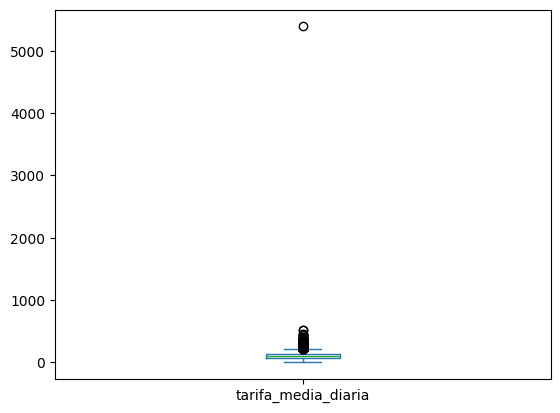

In [20]:
#Permite visualizar valores extremos que podem distorcer a análise financeira.
df['tarifa_media_diaria'].plot(kind='box')

In [21]:
#Elimina valores irrealistas de tarifa que não representam o comportamento típico do negócio.
df=df[df['tarifa_media_diaria']<5000]

Os valores acima de 5000 são removidos para evitar que preços atípicos influenciem decisões estratégicas.

#### Análise de Dados e Visualização

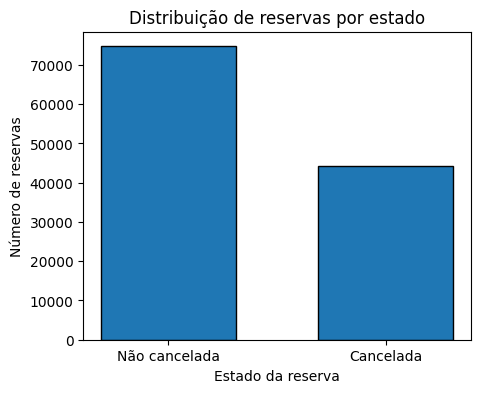

In [22]:
#Calcula a proporção de reservas canceladas e não canceladas para medir a gravidade do problema.
numero_reserva_cancelada=df['reserva_cancelada'].value_counts(normalize=True)
numero_reserva_cancelada
plt.figure(figsize=(5,4))


plt.title('Distribuição de reservas por estado')
plt.xlabel('Estado da reserva')
plt.ylabel('Número de reservas')
plt.bar(['Não canceladas', 'Canceladas'], df['reserva_cancelada'].value_counts(), edgecolor='k', width=0.62)
plt.xticks(ticks=[0,1], labels=['Não cancelada', 'Cancelada'], rotation=0)
plt.show()

Observa-se que, apesar de existir um numero maior de reservas nao canceladas, o volume de cancelamentos e muito elevado. Isso indica que uma parte signficativa dos clientes desiste da reserva antes da estadia.
Conclusao: A taxa de cancelamento e alta, o que prejudica directamente a receita e a ocupacao dos quartos.

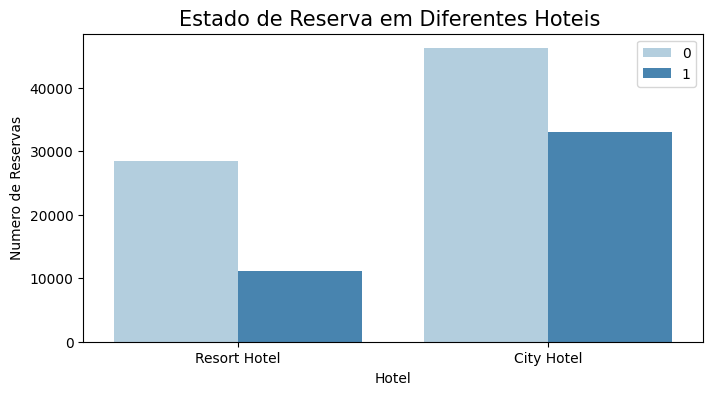

In [23]:
plt.figure(figsize=(8,4))
ax1=sns.countplot(x='Hotel', hue='reserva_cancelada', data=df, palette='Blues')
legend_labels,_=ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Estado de Reserva em Diferentes Hoteis ', size=15)
plt.xlabel('Hotel')
plt.ylabel('Numero de Reservas')
plt.show()

O City Hotel apresenta um numero muito maior de cancelamentos em comparacao com o Resort Hotel, isso indica que o City maior instabilidade nas reservas.
Conclusao: O City Hotel representa o maior risco financeiro e deve ser o focoprincipal das estrategias de melhoria.

In [24]:
resort_hotel=df[df['Hotel']=='Resort Hotel']
resort_hotel['reserva_cancelada'].value_counts(normalize=True)

0    0.72025
1    0.27975
Name: reserva_cancelada, dtype: float64

In [25]:
city_hotel=df[df['Hotel']=='City Hotel']
city_hotel['reserva_cancelada'].value_counts(normalize=True)

0    0.582918
1    0.417082
Name: reserva_cancelada, dtype: float64

In [26]:
resort_hotel=resort_hotel.groupby('data_estado_reserva')[['tarifa_media_diaria']].mean()
city_hotel=city_hotel.groupby('data_estado_reserva')[['tarifa_media_diaria']].mean()

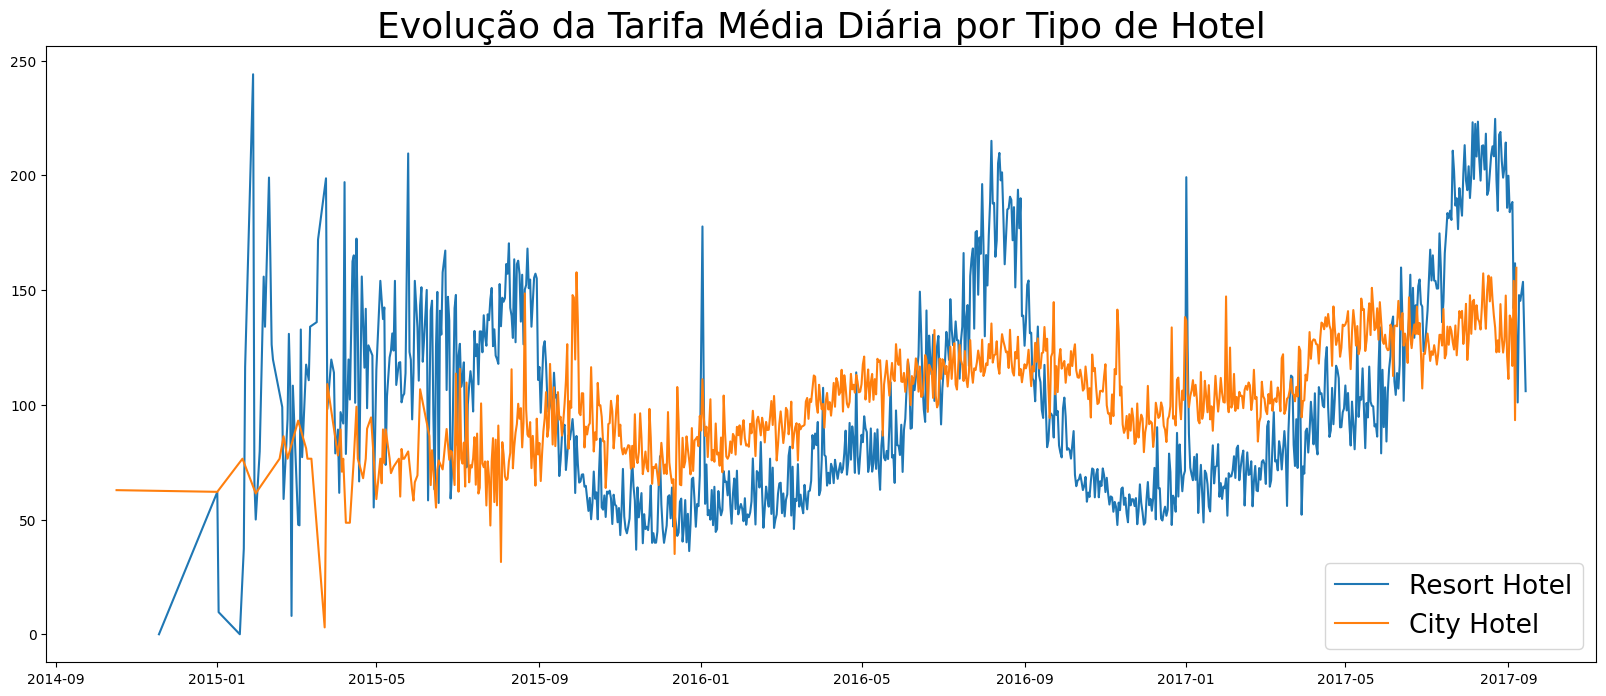

In [27]:
plt.figure(figsize=(20,8))
plt.title('Evolução da Tarifa Média Diária por Tipo de Hotel', fontsize=26)
plt.plot(resort_hotel.index, resort_hotel['tarifa_media_diaria'], label='Resort Hotel')
plt.plot(city_hotel.index, city_hotel['tarifa_media_diaria'], label='City Hotel')
plt.legend(fontsize=19)
plt.show()

O gráfico da evolução da tarifa média diária demonstra que o Resort Hotel apresenta maior volatilidade de preços, com oscilações que variam aproximadamente entre 40 e 230 unidades monetárias ao longo do período analisado, evidenciando forte influência sazonal e dependência da procura turística. Em contraste, o City Hotel apresenta comportamento mais estável, com variações entre cerca de 60 e 160, revelando crescimento mais gradual e previsível. A diferença significativa na amplitude das tarifas indica estratégias de precificação distintas: enquanto o Resort adopta uma política mais dinâmica e sensível à época alta, o City mantém maior consistência nos preços, embora isso não elimine o risco de cancelamento já identificado em análises anteriores.

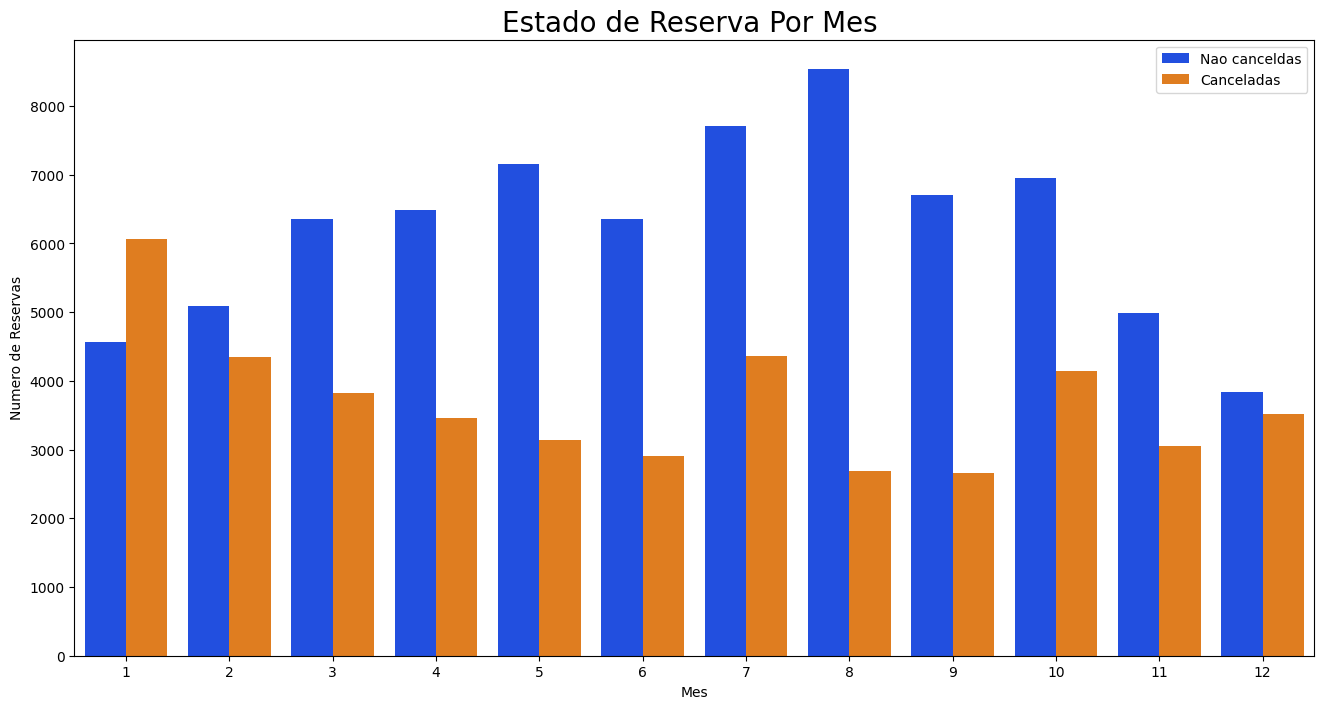

In [28]:
df['mes']=df['data_estado_reserva'].dt.month
plt.figure(figsize=(16,8))
ax1=sns.countplot(x='mes', hue='reserva_cancelada', data=df, palette='bright')

legend_labels,_=ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Estado de Reserva Por Mes ', size=20)
plt.xlabel('Mes')
plt.ylabel('Numero de Reservas')
plt.legend(['Nao canceldas', 'Canceladas'])

plt.show()


Os cancelamentos variam ao longo do ano, existem mese com maior estabilidade, maior numero de desistencias. Isso demonstra influencia da sazonalidade. A empresa pode prever perodos criticos e preparar estrategias especificas.

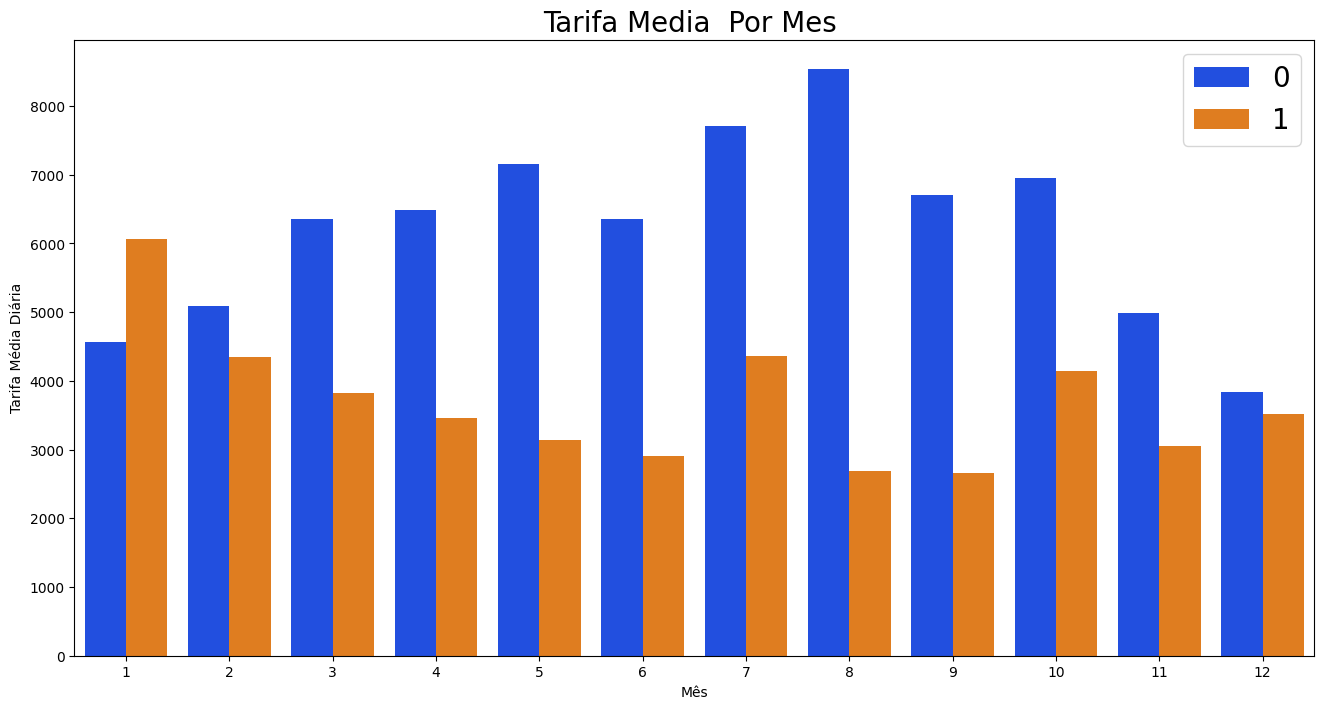

In [29]:
plt.figure(figsize=(16,8))
ax1=sns.countplot(x='mes', hue='reserva_cancelada', data=df, palette='bright')

legend_labels,_=ax1.get_legend_handles_labels()

plt.title('Tarifa Media  Por Mes ', size=20)
df_canceladas = df[df['reserva_cancelada']==1]
df_agregado = df_canceladas.groupby('mes')[['tarifa_media_diaria']].sum().reset_index()

plt.legend(fontsize=20)
plt.xlabel('Mês')
plt.ylabel('Tarifa Média Diária')


plt.show()


([<matplotlib.patches.Wedge at 0x1a0ef157fd0>,
 [Text(-0.6485414980270044, 0.888478432679651, 'PRT'),
  Text(-0.12452901505974424, -1.0929284168728757, 'GBR'),
  Text(0.2795827699816853, -1.0638766257087182, 'ESP'),
  Text(0.6082427774650023, -0.9165373553007318, 'FRA'),
  Text(0.8244337697170071, -0.7282231521657391, 'ITA'),
  Text(0.9549224064682716, -0.5460065911917595, 'DEU'),
  Text(1.0312598327523899, -0.38275730868464564, 'IRL'),
  Text(1.0729025706347506, -0.24265216653750293, 'BRA'),
  Text(1.0926161903610716, -0.12723938290033737, 'USA'),
  Text(1.0992090719340442, -0.041706308610296686, 'BEL')],
 [Text(-0.35374990801472966, 0.48462459964344595, '70.07'),
  Text(-0.06792491730531504, -0.5961427728397503, '6.25'),
  Text(0.1524996927172829, -0.5802963412956644, '5.54'),
  Text(0.331768787708183, -0.49992946652767184, '4.93'),
  Text(0.44969114711836744, -0.39721262845403943, '3.39'),
  Text(0.5208667671645117, -0.297821777013687, '3.10'),
  Text(0.5625053633194853, -0.20877671

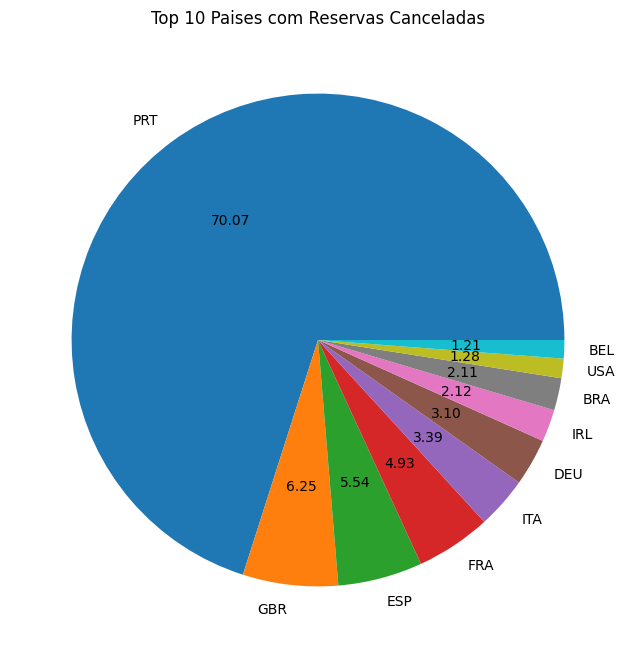

In [30]:
cancelado=df[df['reserva_cancelada']==1]
top_10_paises=cancelado['pais'].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.title('Top 10 Paises com Reservas Canceladas')
plt.pie(top_10_paises, autopct='%.2f', labels=top_10_paises.index)

O gráfico da evolução da tarifa média diária mostra oscilações significativas ao longo do tempo. Observam-se períodos em que a tarifa média ultrapassa 150–180 unidades monetárias, especialmente em épocas de maior procura, enquanto em períodos mais baixos situa-se entre 80 e 100. Nota-se que em fases de maior valorização do preço há também maior volatilidade. Esta variação indica forte influência da sazonalidade e aplicação de estratégias de revenue management. A diferença entre picos e períodos baixos pode ultrapassar 70–80 unidades monetárias, evidenciando elasticidade na procura.

In [31]:
df['segmento_mercado'].value_counts(normalize=True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: segmento_mercado, dtype: float64

In [32]:
cancelado['segmento_mercado'].value_counts(normalize=True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: segmento_mercado, dtype: float64

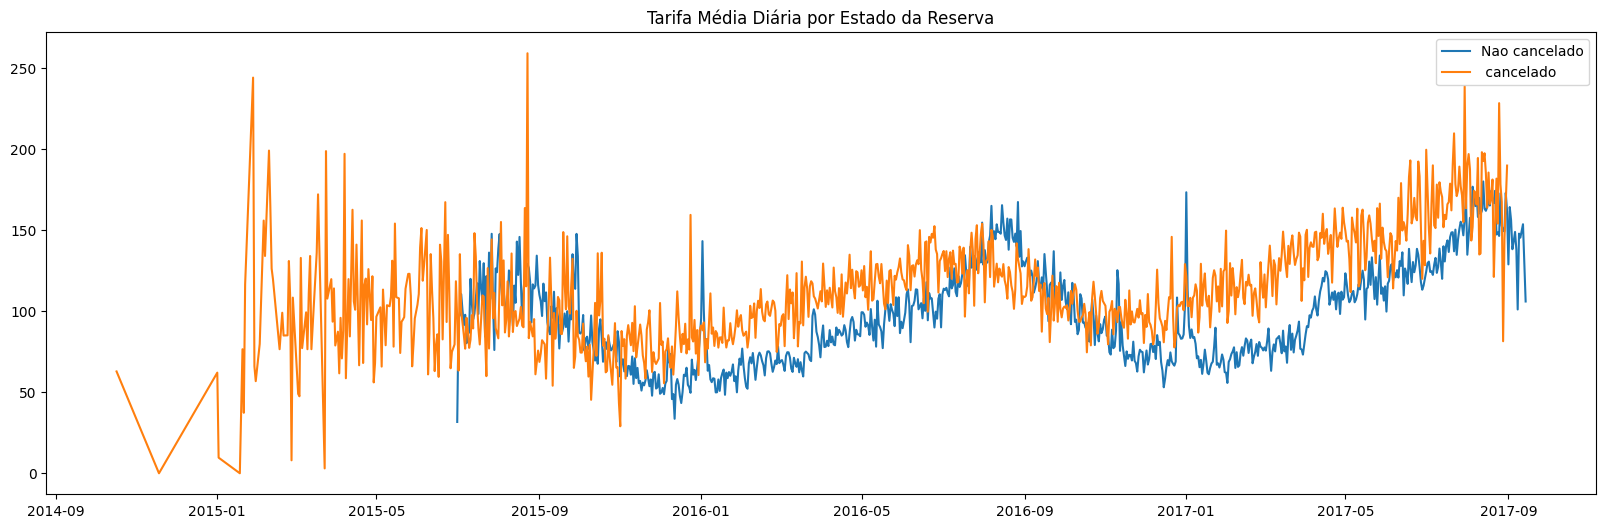

In [33]:
tarifa_media_diaria_cancelamento=cancelado.groupby('data_estado_reserva')[['tarifa_media_diaria']].mean()
tarifa_media_diaria_cancelamento.reset_index(inplace=True)
tarifa_media_diaria_cancelamento.sort_values('data_estado_reserva', inplace=True)

nao_cancelado=df[df['reserva_cancelada']==0]
tarifa_media_diaria_naocancelamento=nao_cancelado.groupby('data_estado_reserva')[['tarifa_media_diaria']].mean()
tarifa_media_diaria_naocancelamento.reset_index(inplace=True)
tarifa_media_diaria_naocancelamento.sort_values('data_estado_reserva', inplace=True)


plt.figure(figsize=(20,6))
plt.title('Tarifa Média Diária por Estado da Reserva')
plt.plot(tarifa_media_diaria_naocancelamento['data_estado_reserva'], tarifa_media_diaria_naocancelamento['tarifa_media_diaria'], label='Nao cancelado' )
plt.plot(tarifa_media_diaria_cancelamento['data_estado_reserva'], tarifa_media_diaria_cancelamento['tarifa_media_diaria'], label=' cancelado' )
plt.legend()


No gráfico comparativo da tarifa média diária por estado da reserva, observa-se que as reservas canceladas apresentam, em vários períodos, tarifa média superior às não canceladas.  Isto sugere que reservas com preço mais elevado tendem a apresentar maior probabilidade de cancelamento, indicando sensibilidade ao preço e possível comportamento de comparação de ofertas por parte dos clientes.

In [34]:
tarifa_media_diaria_cancelamento=tarifa_media_diaria_cancelamento[(tarifa_media_diaria_cancelamento['data_estado_reserva']>'2016')  & (tarifa_media_diaria_cancelamento['data_estado_reserva']<'2017-09')]
tarifa_media_diaria_naocancelamento=tarifa_media_diaria_naocancelamento[(tarifa_media_diaria_naocancelamento['data_estado_reserva']>'2016')  & (tarifa_media_diaria_naocancelamento['data_estado_reserva']<'2017-09')]


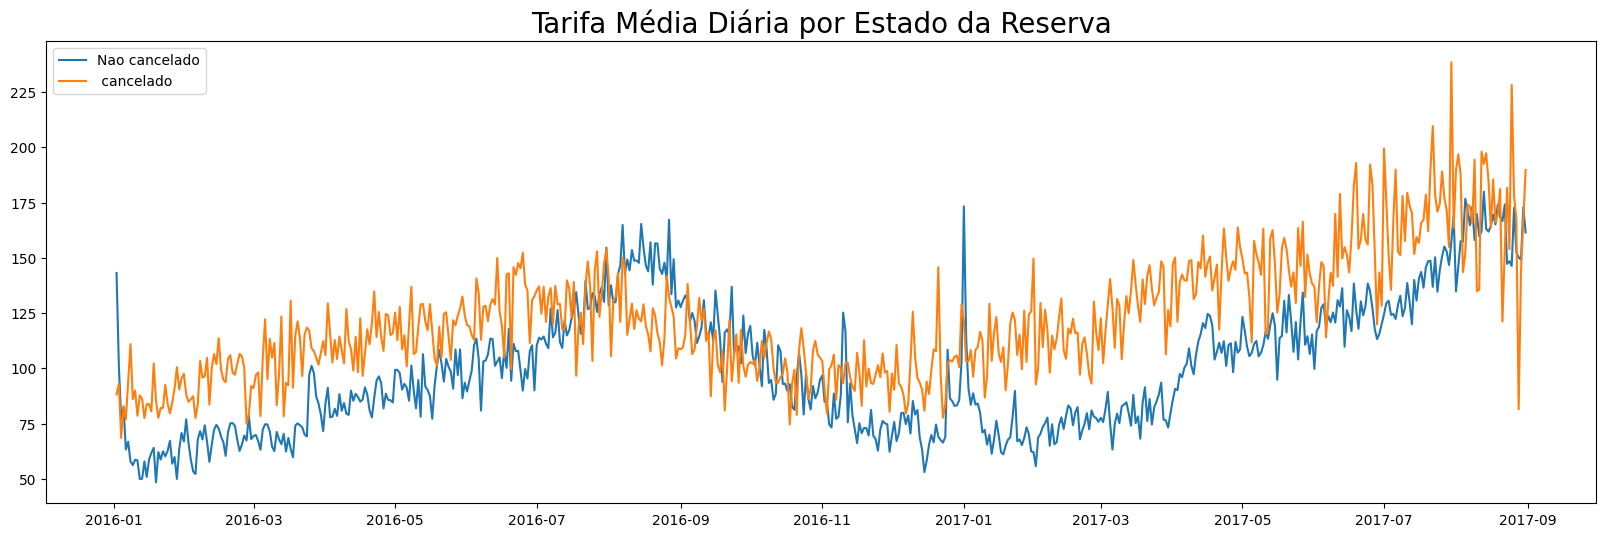

In [35]:

plt.figure(figsize=(20,6))
plt.title('Tarifa Média Diária por Estado da Reserva', fontsize=20)
plt.plot(tarifa_media_diaria_naocancelamento['data_estado_reserva'], tarifa_media_diaria_naocancelamento['tarifa_media_diaria'], label='Nao cancelado' )
plt.plot(tarifa_media_diaria_cancelamento['data_estado_reserva'], tarifa_media_diaria_cancelamento['tarifa_media_diaria'], label=' cancelado' )
plt.legend()

No período entre 2016 e Setembro de 2017, observa-se que a tarifa média diária das reservas canceladas é consistentemente superior à das reservas não canceladas, com diferenças que variam aproximadamente entre 20 e 30 unidades monetárias. Enquanto as reservas não canceladas oscilam maioritariamente entre 80 e 110, as reservas canceladas atingem frequentemente valores acima de 130 e aproximam-se de 150 em determinados momentos. Esta diferença sugere uma relação directa entre nível de preço e probabilidade de cancelamento, evidenciando sensibilidade ao preço por parte dos clientes e indicando a necessidade de estratégias de precificação associadas a políticas de retenção.

In [36]:
Recomendacoes

NameError: name 'Recomendacoes' is not defined

#### 1.Política de Depósito Inteligente e Segmentada



Como o City Hotel apresenta maior taxa de cancelamento (≈41%), recomenda-se:

Exigir depósito parcial ou tarifa não reembolsável para reservas de maior risco

Aplicar política diferenciada em meses com cancelamento superior a 40%

Adaptar regras por segmento de mercado e país

Isso reduzirá desistências oportunistas.

#### 2.Estratégia de Preço Baseada em Risco

A análise mostrou que reservas com tarifa média mais elevada apresentam maior probabilidade de cancelamento.
Recomenda-se:

a)Oferecer opção de desconto não reembolsável

b)Aplicar preço dinâmico considerando risco de cancelamento

c)Monitorar elasticidade da procura

O objectivo não é apenas maximizar preço, mas optimizar preço × probabilidade de conversão efectiva.

#### 3.Gestão Estratégica da Sazonalidade

Como há variação de até 15–20 pontos percentuais entre meses:

a) Implementar overbooking controlado em meses de alto cancelamento

b) Reforçar confirmação activa (email/telefone) antes da data de estadia

c) Ajustar políticas comerciais conforme período do ano

Antecipar meses críticos reduz impacto financeiro.

#### 4.Foco no City Hotel

O City concentra maior volume absoluto e maior taxa de cancelamento.

Recomenda-se:

a) Análise aprofundada do perfil do cliente urbano

b) Parcerias corporativas com cláusulas de compromisso

c) Programa de fidelização específico

Pequena redução percentual no City gera grande impacto financeiro.

#### 5.Investimento em Fidelização

A maioria dos clientes não é repetente.

Clientes repetentes tendem a cancelar menos.

Recomenda-se:

a) Programa de fidelização

b) Benefícios progressivos

c) Incentivo à recompra

Reduz volatilidade da receita.

### Conclusão Estratégica Final

A análise demonstra que o cancelamento não é um fenómeno aleatório, mas sim influenciado por:

1.Tipo de hotel

2.Sazonalidade

3.Nível de preço

4.Segmento de mercado

5.Perfil do cliente

A implementação de estratégias baseadas em dados pode reduzir significativamente o impacto financeiro e aumentar a previsibilidade da receita.


**Autor:** Nelson Cossa
**Data:** 13/02/2026

**Fim da Análise**